In [1]:
import melodist
import melodist.util
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

wind
humidity
temperature
radiation
precipitation

In [2]:
tasmax = xr.open_dataset('C:\\Users\\Deepika Chandrababu\\Desktop\\uk_dataset\\tasmax_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc')
tasmin = xr.open_dataset('C:\\Users\\Deepika Chandrababu\\Desktop\\uk_dataset\\tasmin_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc')

huss = xr.open_dataset('C:\\Users\\Deepika Chandrababu\\Desktop\\uk_dataset\\huss_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc')
precip = xr.open_dataset('C:\\Users\\Deepika Chandrababu\\Desktop\\uk_dataset\\pr_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc')

longwave = xr.open_dataset('C:\\Users\\Deepika Chandrababu\\Desktop\\uk_dataset\\rls_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc')
shortwave = xr.open_dataset('C:\\Users\\Deepika Chandrababu\\Desktop\\uk_dataset\\rss_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc')

uas = xr.open_dataset('C:\\Users\\Deepika Chandrababu\\Desktop\\uk_dataset\\uas_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc')
vas = xr.open_dataset('C:\\Users\\Deepika Chandrababu\\Desktop\\uk_dataset\\vas_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc')

In [3]:
tasmax = tasmax.convert_calendar(calendar = "standard", dim='time', align_on= "year", missing=None, use_cftime=False)
tasmin = tasmin.convert_calendar(calendar = "standard", dim='time', align_on= "year", missing=None, use_cftime=False)
huss = huss.convert_calendar(calendar = "standard", dim='time', align_on= "year", missing=None, use_cftime=False)
precip = precip.convert_calendar(calendar = "standard", dim='time', align_on= "year", missing=None, use_cftime=False)
longwave = longwave.convert_calendar(calendar = "standard", dim='time', align_on= "year", missing=None, use_cftime=False)
shortwave = shortwave.convert_calendar(calendar = "standard", dim='time', align_on= "year", missing=None, use_cftime=False)
uas = uas.convert_calendar(calendar = "standard", dim='time', align_on= "year", missing=None, use_cftime=False)
vas = vas.convert_calendar(calendar = "standard", dim='time', align_on= "year", missing=None, use_cftime=False)

In [12]:
min_lon =-90000

max_lon =150000

min_lat =138000
max_lat =318000

cropped_ds_max = tasmax.sel(projection_x_coordinate=slice(min_lat,max_lat), projection_y_coordinate=slice(min_lon,max_lon))
cropped_ds_min = tasmin.sel(projection_x_coordinate=slice(min_lat,max_lat), projection_y_coordinate=slice(min_lon,max_lon))
cropped_ds_huss = huss.sel(projection_x_coordinate=slice(min_lat,max_lat), projection_y_coordinate=slice(min_lon,max_lon))
cropped_ds_precip = precip.sel(projection_x_coordinate=slice(min_lat,max_lat), projection_y_coordinate=slice(min_lon,max_lon))
cropped_ds_rss= shortwave.sel(projection_x_coordinate=slice(min_lat,max_lat), projection_y_coordinate=slice(min_lon,max_lon))
cropped_ds_rls = longwave.sel(projection_x_coordinate=slice(min_lat,max_lat), projection_y_coordinate=slice(min_lon,max_lon))
cropped_ds_uas = uas.sel(projection_x_coordinate=slice(min_lat,max_lat), projection_y_coordinate=slice(min_lon,max_lon))
cropped_ds_vas = vas.sel(projection_x_coordinate=slice(min_lat,max_lat), projection_y_coordinate=slice(min_lon,max_lon))

In [13]:
mask_lon = (tasmax.longitude >= min_lon) & (tasmax.longitude <= max_lon)
mask_lat = (tasmax.latitude >= min_lat) & (tasmax.latitude<= max_lat)

mask_lon_min = (tasmin.grid_longitude >= min_lon) & (tasmin.grid_longitude <= max_lon)
mask_lat_min = (tasmin.grid_latitude >= min_lat) & (tasmin.grid_latitude<= max_lat)

mask_lon_huss = (huss.grid_longitude >= min_lon) & (huss.grid_longitude <= max_lon)
mask_lat_huss = (huss.grid_latitude >= min_lat) & (huss.grid_latitude<= max_lat)

mask_lon_precip = (precip.grid_longitude >= min_lon) & (precip.grid_longitude <= max_lon)
mask_lat_precip = (precip.grid_latitude >= min_lat) & (precip.grid_latitude<= max_lat)

mask_lon_rls = (longwave.grid_longitude >= min_lon) & (longwave.grid_longitude <= max_lon)
mask_lat_rls = (longwave.grid_latitude >= min_lat) & (longwave.grid_latitude<= max_lat)

mask_lon_rss = (shortwave.grid_longitude >= min_lon) & (shortwave.grid_longitude <= max_lon)
mask_lat_rss = (shortwave.grid_latitude >= min_lat) & (shortwave.grid_latitude<= max_lat)

mask_lon_uas = (uas.grid_longitude >= min_lon) & (uas.grid_longitude <= max_lon)
mask_lat_vas = (vas.grid_latitude >= min_lat) & (uas.grid_latitude<= max_lat)

In [6]:
cropped_ds_max

<xarray.Dataset>
Dimensions:                       (ensemble_member: 1, time: 3600,
                                   projection_y_coordinate: 21,
                                   projection_x_coordinate: 16, bnds: 2)
Coordinates:
  * ensemble_member               (ensemble_member) int32 1
  * time                          (time) datetime64[ns] 2040-12-02T12:00:00 ....
  * projection_y_coordinate       (projection_y_coordinate) float64 -9e+04 .....
  * projection_x_coordinate       (projection_x_coordinate) float64 1.38e+05 ...
Dimensions without coordinates: bnds
Data variables:
    tasmax                        (ensemble_member, time, projection_y_coordinate, projection_x_coordinate) float32 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) object ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ...
    ensemble_member_id            (ensemble_member) |S27 ...
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number                  (time) int32 ...
    year                          (time) int32 ...
    yyyymmdd                      (time) |S64 ...
Attributes: (12/15)
    collection:      land-rcm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2018-11-04T02:24:03
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      12km
    scenario:        rcp85
    source:          UKCP18 regional realisation from a set of 12 limited-are...
    title:           UKCP18 land projections - 12km regional climate model, m...
    version:         v20181122
    Conventions:     CF-1.5

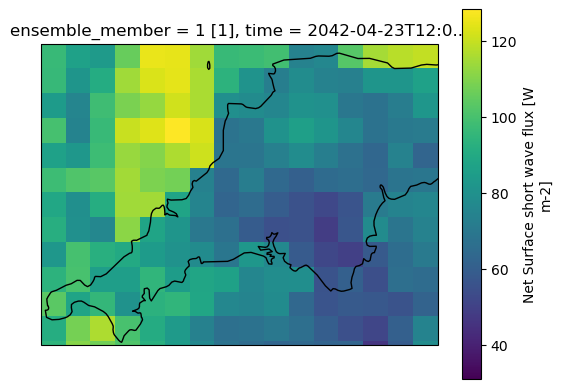

In [7]:
# all variables are cropped
hum = cropped_ds_rss['rss']

p = hum.isel(time=500).plot(
    subplot_kws =dict(projection=ccrs.epsg(7405), facecolor="white"),
    transform=ccrs.epsg(7405))

# plt.title("Minimum air temperature")
# p.axes.set_global()

p.axes.coastlines()

In [4]:
hux = huss.to_dataframe()

In [7]:
year1 = cropped_ds_max.sel(time="2042")
year2 = cropped_ds_max.sel(time="2043")
year3 = cropped_ds_max.sel(time="2044")
year4 = cropped_ds_max.sel(time="2045")
year5 = cropped_ds_max.sel(time="2046")
year6 = cropped_ds_max.sel(time="2047")

years = xr.merge([year1,year2,year3,year4,year5,year6])

cropped_df_max = years.to_dataframe()


cropped_df_max.pop("transverse_mercator")
cropped_df_max.pop("time_bnds")
cropped_df_max.pop("projection_y_coordinate_bnds")
cropped_df_max.pop("projection_x_coordinate_bnds")
cropped_df_max.pop("ensemble_member_id")
cropped_df_max.pop("month_number")
cropped_df_max.pop("year")
cropped_df_max.pop("yyyymmdd")

cropped_df_max

tasmax  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds              
1               2042-01-01 12:00:00 -90000.0                138000.0                0     12.023014   
                                                                                    1     12.023014   
                                                            150000.0                0     12.028426   
                                                                                    1     12.028426   
                                                            162000.0                0     12.030669   
...                                                                                             ...   
                2047-12-31 12:00:00  150000.0               294000.0                1     10.825383   
                                                            306000.0                0     10.597687   
                                                                                    1     10.597687   
                                                            318000.0                0     10.308237   
                                                                                    1     10.308237   

                                                                                          latitude  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds             
1               2042-01-01 12:00:00 -90000.0                138000.0                0     0.714428   
                                                                                    1     0.714428   
                                                            150000.0                0     0.685982   
                                                                                    1     0.685982   
                                                            162000.0                0     0.657530   
...                                                                                            ...   
                2047-12-31 12:00:00  150000.0               294000.0                1     2.425739   
                                                            306000.0                0     2.397283   
                                                                                    1     2.397283   
                                                            318000.0                0     2.368818   
                                                                                    1     2.368818   

                                                                                          longitude  
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds             
1               2042-01-01 12:00:00 -90000.0                138000.0                0    -15.208770  
                                                                                    1    -15.208770  
                                                            150000.0                0    -15.105033  
                                                                                    1    -15.105033  
                                                            162000.0                0    -15.001290  
...                                                                                             ...  
                2047-12-31 12:00:00  150000.0               294000.0                1    -13.288405  
                                                            306000.0                0    -13.184525  
                                                                                    1    -13.184525  
                                                            318000.0                0    -13.080646  
                                                                                    1    -13.080646  

[1451520 rows x 3 columns]

In [7]:
year1 = cropped_ds_min.sel(time="2042")
year2 = cropped_ds_min.sel(time="2043")
year3 = cropped_ds_min.sel(time="2044")
year4 = cropped_ds_min.sel(time="2045")
year5 = cropped_ds_min.sel(time="2046")
year6 = cropped_ds_min.sel(time="2047")

years = xr.merge([year1,year2,year3,year4,year5,year6])

cropped_df_min = years.to_dataframe()

cropped_df_min.pop("transverse_mercator")
cropped_df_min.pop("time_bnds")
cropped_df_min.pop("projection_y_coordinate_bnds")
cropped_df_min.pop("projection_x_coordinate_bnds")
cropped_df_min.pop("ensemble_member_id")
cropped_df_min.pop("month_number")
cropped_df_min.pop("year")
cropped_df_min.pop("yyyymmdd")

cropped_df_min

tasmin  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds             
1               2042-01-01 12:00:00 -90000.0                138000.0                0     9.735847   
                                                                                    1     9.735847   
                                                            150000.0                0     9.548375   
                                                                                    1     9.548375   
                                                            162000.0                0     9.347980   
...                                                                                            ...   
                2047-12-31 12:00:00  150000.0               294000.0                1     7.776000   
                                                            306000.0                0     7.320796   
                                                                                    1     7.320796   
                                                            318000.0                0     6.871942   
                                                                                    1     6.871942   

                                                                                          grid_latitude  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                  
1               2042-01-01 12:00:00 -90000.0                138000.0                0          0.714428   
                                                                                    1          0.714428   
                                                            150000.0                0          0.685982   
                                                                                    1          0.685982   
                                                            162000.0                0          0.657530   
...                                                                                                 ...   
                2047-12-31 12:00:00  150000.0               294000.0                1          2.425739   
                                                            306000.0                0          2.397283   
                                                                                    1          2.397283   
                                                            318000.0                0          2.368818   
                                                                                    1          2.368818   

                                                                                          grid_longitude  
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                  
1               2042-01-01 12:00:00 -90000.0                138000.0                0         -15.208770  
                                                                                    1         -15.208770  
                                                            150000.0                0         -15.105033  
                                                                                    1         -15.105033  
                                                            162000.0                0         -15.001290  
...                                                                                                  ...  
                2047-12-31 12:00:00  150000.0               294000.0                1         -13.288405  
                                                            306000.0                0         -13.184525  
                                                                                    1         -13.184525  
                                                            318000.0                0         -13.080646  
                                                                                    1    

In [138]:
year1 = cropped_ds_huss.sel(time="2042")
year2 = cropped_ds_huss.sel(time="2043")
year3 = cropped_ds_huss.sel(time="2044")
year4 = cropped_ds_huss.sel(time="2045")
year5 = cropped_ds_huss.sel(time="2046")
year6 = cropped_ds_huss.sel(time="2047")

years = xr.merge([year1,year2,year3,year4,year5,year6])

cropped_df_huss = years.to_dataframe()

cropped_df_huss.pop("transverse_mercator")
cropped_df_huss.pop("time_bnds")
cropped_df_huss.pop("projection_y_coordinate_bnds")
cropped_df_huss.pop("projection_x_coordinate_bnds")
cropped_df_huss.pop("ensemble_member_id")
cropped_df_huss.pop("month_number")
cropped_df_huss.pop("year")
cropped_df_huss.pop("yyyymmdd")

cropped_df_huss

huss  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds             
1               2042-01-01 12:00:00 -90000.0                138000.0                0     0.005716   
                                                                                    1     0.005716   
                                                            150000.0                0     0.005717   
                                                                                    1     0.005717   
                                                            162000.0                0     0.005696   
...                                                                                            ...   
                2047-12-31 12:00:00  150000.0               294000.0                1     0.006647   
                                                            306000.0                0     0.006614   
                                                                                    1     0.006614   
                                                            318000.0                0     0.006575   
                                                                                    1     0.006575   

                                                                                          grid_longitude  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                   
1               2042-01-01 12:00:00 -90000.0                138000.0                0         -15.208770   
                                                                                    1         -15.208770   
                                                            150000.0                0         -15.105033   
                                                                                    1         -15.105033   
                                                            162000.0                0         -15.001290   
...                                                                                                  ...   
                2047-12-31 12:00:00  150000.0               294000.0                1         -13.288405   
                                                            306000.0                0         -13.184525   
                                                                                    1         -13.184525   
                                                            318000.0                0         -13.080646   
                                                                                    1         -13.080646   

                                                                                          grid_latitude  
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                 
1               2042-01-01 12:00:00 -90000.0                138000.0                0          0.714428  
                                                                                    1          0.714428  
                                                            150000.0                0          0.685982  
                                                                                    1          0.685982  
                                                            162000.0                0          0.657530  
...                                                                                                 ...  
                2047-12-31 12:00:00  150000.0               294000.0                1          2.425739  
                                                            306000.0                0          2.397283  
                                                                                    1          2.397283  
                                                            318000.0                0          2.368818  
                                                                                    1     

In [139]:
year1 = cropped_ds_precip.sel(time="2042")
year2 = cropped_ds_precip.sel(time="2043")
year3 = cropped_ds_precip.sel(time="2044")
year4 = cropped_ds_precip.sel(time="2045")
year5 = cropped_ds_precip.sel(time="2046")
year6 = cropped_ds_precip.sel(time="2047")

years = xr.merge([year1,year2,year3,year4,year5,year6])

cropped_df_precip = years.to_dataframe()

cropped_df_precip.pop("transverse_mercator")
cropped_df_precip.pop("time_bnds")
cropped_df_precip.pop("projection_y_coordinate_bnds")
cropped_df_precip.pop("projection_x_coordinate_bnds")
cropped_df_precip.pop("ensemble_member_id")
cropped_df_precip.pop("month_number")
cropped_df_precip.pop("year")
cropped_df_precip.pop("yyyymmdd")

cropped_df_precip

pr  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds             
1               2042-01-01 12:00:00 -90000.0                138000.0                0     0.070985   
                                                                                    1     0.070985   
                                                            150000.0                0     0.086259   
                                                                                    1     0.086259   
                                                            162000.0                0     0.114204   
...                                                                                            ...   
                2047-12-31 12:00:00  150000.0               294000.0                1     0.049129   
                                                            306000.0                0     0.126862   
                                                                                    1     0.126862   
                                                            318000.0                0     0.276456   
                                                                                    1     0.276456   

                                                                                          grid_longitude  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                   
1               2042-01-01 12:00:00 -90000.0                138000.0                0         -15.208770   
                                                                                    1         -15.208770   
                                                            150000.0                0         -15.105033   
                                                                                    1         -15.105033   
                                                            162000.0                0         -15.001290   
...                                                                                                  ...   
                2047-12-31 12:00:00  150000.0               294000.0                1         -13.288405   
                                                            306000.0                0         -13.184525   
                                                                                    1         -13.184525   
                                                            318000.0                0         -13.080646   
                                                                                    1         -13.080646   

                                                                                          grid_latitude  
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                 
1               2042-01-01 12:00:00 -90000.0                138000.0                0          0.714428  
                                                                                    1          0.714428  
                                                            150000.0                0          0.685982  
                                                                                    1          0.685982  
                                                            162000.0                0          0.657530  
...                                                                                                 ...  
                2047-12-31 12:00:00  150000.0               294000.0                1          2.425739  
                                                            306000.0                0          2.397283  
                                                                                    1          2.397283  
                                                            318000.0                0          2.368818  
                                                                                    1       

In [140]:
year1 = cropped_ds_rls.sel(time="2042")
year2 = cropped_ds_rls.sel(time="2043")
year3 = cropped_ds_rls.sel(time="2044")
year4 = cropped_ds_rls.sel(time="2045")
year5 = cropped_ds_rls.sel(time="2046")
year6 = cropped_ds_rls.sel(time="2047")

years = xr.merge([year1,year2,year3,year4,year5,year6])

cropped_df_rls = years.to_dataframe()

cropped_df_rls.pop("transverse_mercator")
cropped_df_rls.pop("time_bnds")
cropped_df_rls.pop("projection_y_coordinate_bnds")
cropped_df_rls.pop("projection_x_coordinate_bnds")
cropped_df_rls.pop("ensemble_member_id")
cropped_df_rls.pop("month_number")
cropped_df_rls.pop("year")
cropped_df_rls.pop("yyyymmdd")

cropped_df_rls

rls  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds              
1               2042-01-01 12:00:00 -90000.0                138000.0                0    -66.408005   
                                                                                    1    -66.408005   
                                                            150000.0                0    -70.411179   
                                                                                    1    -70.411179   
                                                            162000.0                0    -70.866631   
...                                                                                             ...   
                2047-12-31 12:00:00  150000.0               294000.0                1    -56.287792   
                                                            306000.0                0    -51.733921   
                                                                                    1    -51.733921   
                                                            318000.0                0    -51.317104   
                                                                                    1    -51.317104   

                                                                                          grid_longitude  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                   
1               2042-01-01 12:00:00 -90000.0                138000.0                0         -15.208770   
                                                                                    1         -15.208770   
                                                            150000.0                0         -15.105033   
                                                                                    1         -15.105033   
                                                            162000.0                0         -15.001290   
...                                                                                                  ...   
                2047-12-31 12:00:00  150000.0               294000.0                1         -13.288405   
                                                            306000.0                0         -13.184525   
                                                                                    1         -13.184525   
                                                            318000.0                0         -13.080646   
                                                                                    1         -13.080646   

                                                                                          grid_latitude  
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                 
1               2042-01-01 12:00:00 -90000.0                138000.0                0          0.714428  
                                                                                    1          0.714428  
                                                            150000.0                0          0.685982  
                                                                                    1          0.685982  
                                                            162000.0                0          0.657530  
...                                                                                                 ...  
                2047-12-31 12:00:00  150000.0               294000.0                1          2.425739  
                                                            306000.0                0          2.397283  
                                                                                    1          2.397283  
                                                            318000.0                0          2.368818  
                                                                               

In [141]:
year1 = cropped_ds_rss.sel(time="2042")
year2 = cropped_ds_rss.sel(time="2043")
year3 = cropped_ds_rss.sel(time="2044")
year4 = cropped_ds_rss.sel(time="2045")
year5 = cropped_ds_rss.sel(time="2046")
year6 = cropped_ds_rss.sel(time="2047")

years = xr.merge([year1,year2,year3,year4,year5,year6])

cropped_df_rss = years.to_dataframe()

cropped_df_rss.pop("transverse_mercator")
cropped_df_rss.pop("time_bnds")
cropped_df_rss.pop("projection_y_coordinate_bnds")
cropped_df_rss.pop("projection_x_coordinate_bnds")
cropped_df_rss.pop("ensemble_member_id")
cropped_df_rss.pop("month_number")
cropped_df_rss.pop("year")
cropped_df_rss.pop("yyyymmdd")


cropped_df_rss

rss  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds              
1               2042-01-01 12:00:00 -90000.0                138000.0                0     41.058277   
                                                                                    1     41.058277   
                                                            150000.0                0     42.591938   
                                                                                    1     42.591938   
                                                            162000.0                0     42.224293   
...                                                                                             ...   
                2047-12-31 12:00:00  150000.0               294000.0                1     33.736549   
                                                            306000.0                0     31.639397   
                                                                                    1     31.639397   
                                                            318000.0                0     32.049770   
                                                                                    1     32.049770   

                                                                                          grid_latitude  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                  
1               2042-01-01 12:00:00 -90000.0                138000.0                0          0.714428   
                                                                                    1          0.714428   
                                                            150000.0                0          0.685982   
                                                                                    1          0.685982   
                                                            162000.0                0          0.657530   
...                                                                                                 ...   
                2047-12-31 12:00:00  150000.0               294000.0                1          2.425739   
                                                            306000.0                0          2.397283   
                                                                                    1          2.397283   
                                                            318000.0                0          2.368818   
                                                                                    1          2.368818   

                                                                                          grid_longitude  
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                  
1               2042-01-01 12:00:00 -90000.0                138000.0                0         -15.208770  
                                                                                    1         -15.208770  
                                                            150000.0                0         -15.105033  
                                                                                    1         -15.105033  
                                                            162000.0                0         -15.001290  
...                                                                                                  ...  
                2047-12-31 12:00:00  150000.0               294000.0                1         -13.288405  
                                                            306000.0                0         -13.184525  
                                                                                    1         -13.184525  
                                                            318000.0                0         -13.080646  
                                                                                

In [ ]:
year1 = cropped_ds_rss.sel(time="2042")
year2 = cropped_ds_rss.sel(time="2043")
year3 = cropped_ds_rss.sel(time="2044")
year4 = cropped_ds_rss.sel(time="2045")
year5 = cropped_ds_rss.sel(time="2046")
year6 = cropped_ds_rss.sel(time="2047")

years = xr.merge([year1,year2,year3,year4,year5,year6])

cropped_df_rss = years.to_dataframe()

cropped_df_rss.pop("transverse_mercator")
cropped_df_rss.pop("time_bnds")
cropped_df_rss.pop("projection_y_coordinate_bnds")
cropped_df_rss.pop("projection_x_coordinate_bnds")
cropped_df_rss.pop("ensemble_member_id")
cropped_df_rss.pop("month_number")
cropped_df_rss.pop("year")
cropped_df_rss.pop("yyyymmdd")


cropped_df_rss

In [242]:
year1 = cropped_ds_uas.sel(time="2042")
year2 = cropped_ds_uas.sel(time="2043")
year3 = cropped_ds_uas.sel(time="2044")
year4 = cropped_ds_uas.sel(time="2045")
year5 = cropped_ds_uas.sel(time="2046")
year6 = cropped_ds_uas.sel(time="2047")

years = xr.merge([year1,year2,year3,year4,year5,year6])

cropped_df_uas = years.to_dataframe()

cropped_df_uas.pop("transverse_mercator")
cropped_df_uas.pop("time_bnds")
cropped_df_uas.pop("projection_y_coordinate_bnds")
cropped_df_uas.pop("projection_x_coordinate_bnds")
cropped_df_uas.pop("ensemble_member_id")
cropped_df_uas.pop("month_number")
cropped_df_uas.pop("year")
cropped_df_uas.pop("yyyymmdd")


cropped_df_uas

uas  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds             
1               2042-01-01 12:00:00 -90000.0                138000.0                0    -1.009988   
                                                                                    1    -1.009988   
                                                            150000.0                0    -1.000901   
                                                                                    1    -1.000901   
                                                            162000.0                0    -0.940916   
...                                                                                            ...   
                2047-12-31 12:00:00  150000.0               294000.0                1    -5.402636   
                                                            306000.0                0    -5.781791   
                                                                                    1    -5.781791   
                                                            318000.0                0    -5.164458   
                                                                                    1    -5.164458   

                                                                                          grid_longitude  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                   
1               2042-01-01 12:00:00 -90000.0                138000.0                0         -15.208770   
                                                                                    1         -15.208770   
                                                            150000.0                0         -15.105033   
                                                                                    1         -15.105033   
                                                            162000.0                0         -15.001290   
...                                                                                                  ...   
                2047-12-31 12:00:00  150000.0               294000.0                1         -13.288405   
                                                            306000.0                0         -13.184525   
                                                                                    1         -13.184525   
                                                            318000.0                0         -13.080646   
                                                                                    1         -13.080646   

                                                                                          grid_latitude  
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                 
1               2042-01-01 12:00:00 -90000.0                138000.0                0          0.714428  
                                                                                    1          0.714428  
                                                            150000.0                0          0.685982  
                                                                                    1          0.685982  
                                                            162000.0                0          0.657530  
...                                                                                                 ...  
                2047-12-31 12:00:00  150000.0               294000.0                1          2.425739  
                                                            306000.0                0          2.397283  
                                                                                    1          2.397283  
                                                            318000.0                0          2.368818  
                                                                                    1      

In [243]:
year1 = cropped_ds_vas.sel(time="2042")
year2 = cropped_ds_vas.sel(time="2043")
year3 = cropped_ds_vas.sel(time="2044")
year4 = cropped_ds_vas.sel(time="2045")
year5 = cropped_ds_vas.sel(time="2046")
year6 = cropped_ds_vas.sel(time="2047")

years = xr.merge([year1,year2,year3,year4,year5,year6])

cropped_df_vas = years.to_dataframe()

cropped_df_vas.pop("transverse_mercator")
cropped_df_vas.pop("time_bnds")
cropped_df_vas.pop("projection_y_coordinate_bnds")
cropped_df_vas.pop("projection_x_coordinate_bnds")
cropped_df_vas.pop("ensemble_member_id")
cropped_df_vas.pop("month_number")
cropped_df_vas.pop("year")
cropped_df_vas.pop("yyyymmdd")


cropped_df_vas

vas  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds             
1               2042-01-01 12:00:00 -90000.0                138000.0                0     2.549494   
                                                                                    1     2.549494   
                                                            150000.0                0     2.523422   
                                                                                    1     2.523422   
                                                            162000.0                0     2.530344   
...                                                                                            ...   
                2047-12-31 12:00:00  150000.0               294000.0                1    -3.988271   
                                                            306000.0                0    -4.290000   
                                                                                    1    -4.290000   
                                                            318000.0                0    -3.651139   
                                                                                    1    -3.651139   

                                                                                          grid_longitude  \
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                   
1               2042-01-01 12:00:00 -90000.0                138000.0                0         -15.208770   
                                                                                    1         -15.208770   
                                                            150000.0                0         -15.105033   
                                                                                    1         -15.105033   
                                                            162000.0                0         -15.001290   
...                                                                                                  ...   
                2047-12-31 12:00:00  150000.0               294000.0                1         -13.288405   
                                                            306000.0                0         -13.184525   
                                                                                    1         -13.184525   
                                                            318000.0                0         -13.080646   
                                                                                    1         -13.080646   

                                                                                          grid_latitude  
ensemble_member time                projection_y_coordinate projection_x_coordinate bnds                 
1               2042-01-01 12:00:00 -90000.0                138000.0                0          0.714428  
                                                                                    1          0.714428  
                                                            150000.0                0          0.685982  
                                                                                    1          0.685982  
                                                            162000.0                0          0.657530  
...                                                                                                 ...  
                2047-12-31 12:00:00  150000.0               294000.0                1          2.425739  
                                                            306000.0                0          2.397283  
                                                                                    1          2.397283  
                                                            318000.0                0          2.368818  
                                                                                    1      

In [8]:
cropped_df_max.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\tmax\tmax012042-2047.csv")
cropped_df_min.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\tmin\tmin012042-2047.csv")
cropped_df_precip.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\precip\precip012042-2047.csv")
cropped_df_huss.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\huss\huss012042-2047.csv")
cropped_df_rls.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\srad\rls012042-2047.csv")
cropped_df_rss.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\srad\rss012042-2047.csv")
cropped_df_uas.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\uas012042-2047.csv")
cropped_df_vas.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\vas012042-2047.csv")

NameError: name 'cropped_df_precip' is not defined

In [6]:
crop_max = r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\tmax\tmax012042-2047.csv"
crop_min = r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\tmin\tmin012042-2047.csv"
crop_huss = r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\huss\huss012042-2047.csv"
crop_precip = r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\precip\precip012042-2047.csv"
crop_rls = r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\srad\rls012042-2047.csv"
crop_rss = r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\srad\rss012042-2047.csv"
crop_uas = r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\uas012042-2047.csv"
crop_vas = r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\vas012042-2047.csv"


In [91]:
data_obs_tmax = pd.read_csv(crop_max, index_col=0, parse_dates=True)
data_obs_tmin = pd.read_csv(crop_min, index_col=0, parse_dates=True)
data_obs_huss = pd.read_csv(crop_huss, index_col=0, parse_dates=True)
data_obs_precip = pd.read_csv(crop_precip, index_col=0, parse_dates=True)
data_obs_rls= pd.read_csv(crop_rls, index_col=0, parse_dates=True)
data_obs_rss = pd.read_csv(crop_rss, index_col=0, parse_dates=True)
data_obs_uas = pd.read_csv(crop_uas, index_col=0, parse_dates=True)
data_obs_vas = pd.read_csv(crop_vas, index_col=0, parse_dates=True)

In [92]:
data_obs_tmax['time'] = pd.to_datetime(data_obs_tmax['time'])
data_obs_tmax['dates'] = data_obs_tmax['time'].dt.date
data_obs_tmax['hour'] = data_obs_tmax['time'].dt.hour
data_obs_tmax['minute'] =data_obs_tmax['time'].dt.minute
data_obs_tmax['second'] =data_obs_tmax['time'].dt.second

data_obs_tmin['time'] = pd.to_datetime(data_obs_tmin['time'])
data_obs_tmin['dates'] = data_obs_tmin['time'].dt.date
data_obs_tmin['hour'] = data_obs_tmin['time'].dt.hour
data_obs_tmin['minute'] =data_obs_tmin['time'].dt.minute
data_obs_tmin['second'] =data_obs_tmin['time'].dt.second

data_obs_precip['time'] = pd.to_datetime(data_obs_precip['time'])
data_obs_precip['dates'] = data_obs_precip['time'].dt.date
data_obs_precip['hour'] = data_obs_precip['time'].dt.hour
data_obs_precip['minute'] =data_obs_precip['time'].dt.minute
data_obs_precip['second'] =data_obs_precip['time'].dt.second

data_obs_huss['time'] = pd.to_datetime(data_obs_huss['time'])
data_obs_huss['dates'] = data_obs_huss['time'].dt.date
data_obs_huss['hour'] = data_obs_huss['time'].dt.hour
data_obs_huss['minute'] =data_obs_huss['time'].dt.minute
data_obs_huss['second'] =data_obs_huss['time'].dt.second

data_obs_rls['time'] = pd.to_datetime(data_obs_rls['time'])
data_obs_rls['dates'] = data_obs_rls['time'].dt.date
data_obs_rls['hour'] = data_obs_rls['time'].dt.hour
data_obs_rls['minute'] =data_obs_rls['time'].dt.minute
data_obs_rls['second'] =data_obs_rls['time'].dt.second

data_obs_rss['time'] = pd.to_datetime(data_obs_rss['time'])
data_obs_rss['dates'] = data_obs_rss['time'].dt.date
data_obs_rss['hour'] = data_obs_rss['time'].dt.hour
data_obs_rss['minute'] =data_obs_rss['time'].dt.minute
data_obs_rss['second'] =data_obs_rss['time'].dt.second

data_obs_uas['time'] = pd.to_datetime(data_obs_uas['time'])
data_obs_uas['dates'] = data_obs_uas['time'].dt.date
data_obs_uas['hour'] = data_obs_uas['time'].dt.hour
data_obs_uas['minute'] =data_obs_uas['time'].dt.minute
data_obs_uas['second'] =data_obs_uas['time'].dt.second

data_obs_vas['time'] = pd.to_datetime(data_obs_vas['time'])
data_obs_vas['dates'] = data_obs_vas['time'].dt.date
data_obs_vas['hour'] = data_obs_vas['time'].dt.hour
data_obs_vas['minute'] =data_obs_vas['time'].dt.minute
data_obs_vas['second'] =data_obs_vas['time'].dt.second

In [93]:
data_obs_tmax['dates'] = data_obs_tmax['time'].dt.normalize()
data_obs_tmin['dates'] = data_obs_tmin['time'].dt.normalize()
data_obs_precip['dates'] = data_obs_precip['time'].dt.normalize()
data_obs_huss['dates'] = data_obs_huss['time'].dt.normalize()
data_obs_rls['dates'] = data_obs_rls['time'].dt.normalize()
data_obs_rss['dates'] = data_obs_rss['time'].dt.normalize()
data_obs_uas['dates'] = data_obs_uas['time'].dt.normalize()
data_obs_vas['dates'] = data_obs_vas['time'].dt.normalize()


In [94]:
data_obs_tmax.set_index('dates', inplace=True)
data_obs_tmin.set_index('dates', inplace=True)
data_obs_precip.set_index('dates', inplace=True)
data_obs_huss.set_index('dates', inplace=True)
data_obs_rls.set_index('dates', inplace=True)
data_obs_rss.set_index('dates', inplace=True)
data_obs_uas.set_index('dates', inplace=True)
data_obs_vas.set_index('dates', inplace=True)

In [43]:
data_obs_tmax.index.is_all_dates
data_obs_tmin.index.is_all_dates

C:\Users\Deepika Chandrababu\AppData\Local\Temp\ipykernel_3400\3541556364.py:1: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  data_obs_tmax.index.is_all_dates
C:\Users\Deepika Chandrababu\AppData\Local\Temp\ipykernel_3400\3541556364.py:2: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  data_obs_tmin.index.is_all_dates


True

In [35]:
data_obs_precip.index.is_all_dates

C:\Users\Deepika Chandrababu\AppData\Local\Temp\ipykernel_20004\3793152516.py:1: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  data_obs_precip.index.is_all_dates


True

In [36]:
data_obs_huss.index.is_all_dates

C:\Users\Deepika Chandrababu\AppData\Local\Temp\ipykernel_20004\3402796433.py:1: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  data_obs_huss.index.is_all_dates


True

In [37]:
data_obs_rls.index.is_all_dates

C:\Users\Deepika Chandrababu\AppData\Local\Temp\ipykernel_20004\206764330.py:1: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  data_obs_rls.index.is_all_dates


True

In [249]:
data_obs_uas.index.is_all_dates

C:\Users\Deepika Chandrababu\AppData\Local\Temp\ipykernel_20004\4234993788.py:1: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  data_obs_uas.index.is_all_dates


True

In [12]:
data_obs_tmax

,time,projection_y_coordinate,projection_x_coordinate,bnds,tasmax,latitude,longitude,hour,minute,second
dates,,,,,,,,,,
2042-01-01,2042-01-01 12:00:00,-90000.0,138000.0,0,12.023014,0.714428,-15.208770,12,0,0
2042-01-01,2042-01-01 12:00:00,-90000.0,138000.0,1,12.023014,0.714428,-15.208770,12,0,0
2042-01-01,2042-01-01 12:00:00,-90000.0,150000.0,0,12.028426,0.685982,-15.105033,12,0,0
2042-01-01,2042-01-01 12:00:00,-90000.0,150000.0,1,12.028426,0.685982,-15.105033,12,0,0
2042-01-01,2042-01-01 12:00:00,-90000.0,162000.0,0,12.030669,0.657530,-15.001290,12,0,0
...,...,...,...,...,...,...,...,...,...,...
2047-12-31,2047-12-31 12:00:00,150000.0,294000.0,1,10.825383,2.425739,-13.288405,12,0,0
2047-12-31,2047-12-31 12:00:00,150000.0,306000.0,0,10.597687,2.397283,-13.184525,12,0,0
2047-12-31,2047-12-31 12:00:00,150000.0,306000.0,1,10.597687,2.397283,-13.184525,12,0,0


In [44]:
data_obs_tmax.pop("projection_y_coordinate")
data_obs_tmax.pop("projection_x_coordinate")
data_obs_tmax.pop("bnds")
data_obs_tmax.pop("latitude")
data_obs_tmax.pop("longitude")
data_obs_tmax.pop("hour")
data_obs_tmax.pop("minute")
data_obs_tmax.pop("second")
# data_obs_tmax.pop("time")

data_obs_tmin.pop("projection_y_coordinate")
data_obs_tmin.pop("projection_x_coordinate")
data_obs_tmin.pop("bnds")
data_obs_tmin.pop("grid_latitude")
data_obs_tmin.pop("grid_longitude")
data_obs_tmin.pop("hour")
data_obs_tmin.pop("minute")
data_obs_tmin.pop("second")
# data_obs_tmax.pop("time")

dates
2042-01-01    0
2042-01-01    0
2042-01-01    0
2042-01-01    0
2042-01-01    0
             ..
2047-12-31    0
2047-12-31    0
2047-12-31    0
2047-12-31    0
2047-12-31    0
Name: second, Length: 1451520, dtype: int64

In [45]:
data_obs_tmin

,time,tasmin
dates,,
2042-01-01,2042-01-01 12:00:00,9.735847
2042-01-01,2042-01-01 12:00:00,9.735847
2042-01-01,2042-01-01 12:00:00,9.548375
2042-01-01,2042-01-01 12:00:00,9.548375
2042-01-01,2042-01-01 12:00:00,9.347980
...,...,...
2047-12-31,2047-12-31 12:00:00,7.776000
2047-12-31,2047-12-31 12:00:00,7.320797
2047-12-31,2047-12-31 12:00:00,7.320797


In [46]:
data_obs_temp = pd.concat([data_obs_tmax, data_obs_tmin],axis =1)
data_obs_temp

,time,tasmax,time,tasmin
dates,,,,
2042-01-01,2042-01-01 12:00:00,12.023014,2042-01-01 12:00:00,9.735847
2042-01-01,2042-01-01 12:00:00,12.023014,2042-01-01 12:00:00,9.735847
2042-01-01,2042-01-01 12:00:00,12.028426,2042-01-01 12:00:00,9.548375
2042-01-01,2042-01-01 12:00:00,12.028426,2042-01-01 12:00:00,9.548375
2042-01-01,2042-01-01 12:00:00,12.030669,2042-01-01 12:00:00,9.347980
...,...,...,...,...
2047-12-31,2047-12-31 12:00:00,10.825383,2047-12-31 12:00:00,7.776000
2047-12-31,2047-12-31 12:00:00,10.597687,2047-12-31 12:00:00,7.320797
2047-12-31,2047-12-31 12:00:00,10.597687,2047-12-31 12:00:00,7.320797


In [47]:
data_obs_temp['temperat'] = data_obs_temp['tasmax'] + data_obs_temp['tasmin'] /2

In [48]:
data_obs_temp['temperature'] = data_obs_temp[['tasmax' , 'tasmin']].mean(axis=1)

In [49]:
data_obs_temp

,time,tasmax,time,tasmin,temperat,temperature
dates,,,,,,
2042-01-01,2042-01-01 12:00:00,12.023014,2042-01-01 12:00:00,9.735847,16.890937,10.879430
2042-01-01,2042-01-01 12:00:00,12.023014,2042-01-01 12:00:00,9.735847,16.890937,10.879430
2042-01-01,2042-01-01 12:00:00,12.028426,2042-01-01 12:00:00,9.548375,16.802613,10.788400
2042-01-01,2042-01-01 12:00:00,12.028426,2042-01-01 12:00:00,9.548375,16.802613,10.788400
2042-01-01,2042-01-01 12:00:00,12.030669,2042-01-01 12:00:00,9.347980,16.704659,10.689324
...,...,...,...,...,...,...
2047-12-31,2047-12-31 12:00:00,10.825383,2047-12-31 12:00:00,7.776000,14.713383,9.300691
2047-12-31,2047-12-31 12:00:00,10.597687,2047-12-31 12:00:00,7.320797,14.258085,8.959242
2047-12-31,2047-12-31 12:00:00,10.597687,2047-12-31 12:00:00,7.320797,14.258085,8.959242


In [50]:
data_obs_temp.pop("time")
# data_obs_temp.pop("tasmax")
# data_obs_temp.pop("tasmin")
data_obs_temp.pop("temperat")

dates
2042-01-01    16.890937
2042-01-01    16.890937
2042-01-01    16.802613
2042-01-01    16.802613
2042-01-01    16.704659
                ...    
2047-12-31    14.713383
2047-12-31    14.258085
2047-12-31    14.258085
2047-12-31    13.744208
2047-12-31    13.744208
Name: temperat, Length: 1451520, dtype: float64

In [51]:
data_obs_temp = data_obs_temp.rename(columns={"tasmax": "tmax", "tasmin": "tmin"})

In [52]:
data_obs_temp = data_obs_temp.groupby(pd.Grouper(freq='d')).mean()

In [53]:
data_obs_temp

,tmax,tmin,temperature
dates,,,
2042-01-01,11.605377,8.153725,9.879551
2042-01-02,11.964275,8.126691,10.045483
2042-01-03,10.373654,7.113896,8.743775
2042-01-04,12.642243,8.778951,10.710597
2042-01-05,11.261233,9.212641,10.236937
...,...,...,...
2047-12-27,10.239804,8.004946,9.122375
2047-12-28,11.769814,8.645374,10.207594
2047-12-29,12.798354,10.886629,11.842491


In [31]:
data_obs_temp.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\temp\temperature.csv")

In [54]:

data_obs_huss.pop("projection_y_coordinate")
data_obs_huss.pop("projection_x_coordinate")
data_obs_huss.pop("bnds")
data_obs_huss.pop("grid_latitude")
data_obs_huss.pop("grid_longitude")
data_obs_huss.pop("hour")
data_obs_huss.pop("minute")
data_obs_huss.pop("second")
data_obs_huss.pop("time")

data_obs_huss

,huss
dates,
2042-01-01,0.005716
2042-01-01,0.005716
2042-01-01,0.005717
2042-01-01,0.005717
2042-01-01,0.005696
...,...
2047-12-31,0.006647
2047-12-31,0.006614
2047-12-31,0.006614


In [56]:
data_obs_huss["hum_min"] = data_obs_huss["huss"].groupby(pd.Grouper(freq='d')).min()
data_obs_huss["hum_max"] = data_obs_huss["huss"].groupby(pd.Grouper(freq='d')).max()

In [57]:
data_obs_hum = data_obs_huss.groupby(pd.Grouper(freq='d')).mean()

In [58]:
data_obs_hum = data_obs_hum.rename(columns={"huss": "hum"})

In [77]:
data_obs_hum

,hum,hum_min,hum_max
dates,,,
2042-01-01,0.005724,0.005123,0.006271
2042-01-02,0.006654,0.006209,0.006914
2042-01-03,0.004827,0.004302,0.005946
2042-01-04,0.006385,0.005537,0.006874
2042-01-05,0.005280,0.004699,0.005555
...,...,...,...
2047-12-27,0.005813,0.004159,0.007879
2047-12-28,0.006943,0.004659,0.009198
2047-12-29,0.008279,0.006857,0.008736


In [60]:
data_obs_hum.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\huss\humidity.csv")

In [95]:

data_obs_precip.pop("projection_y_coordinate")
data_obs_precip.pop("projection_x_coordinate")
data_obs_precip.pop("bnds")
data_obs_precip.pop("grid_latitude")
data_obs_precip.pop("grid_longitude")
data_obs_precip.pop("hour")
data_obs_precip.pop("minute")
data_obs_precip.pop("second")
data_obs_precip.pop("time")

data_obs_precip

,pr
dates,
2042-01-01,0.070985
2042-01-01,0.070985
2042-01-01,0.086259
2042-01-01,0.086259
2042-01-01,0.114204
...,...
2047-12-31,0.049129
2047-12-31,0.126862
2047-12-31,0.126862


In [96]:
data_obs_precip = data_obs_precip.groupby(pd.Grouper(freq='d')).mean()

In [97]:
data_obs_precip = data_obs_precip.rename(columns={"pr": "precip"})

In [98]:
data_obs_precip

,precip
dates,
2042-01-01,0.100894
2042-01-02,4.855429
2042-01-03,3.342196
2042-01-04,6.384910
2042-01-05,1.923238
...,...
2047-12-27,8.367735
2047-12-28,15.691691
2047-12-29,1.683566


In [99]:
data_obs_precip.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\precip\precipitation.csv")

In [83]:
#shortwave radiation
data_obs_rss.pop("projection_y_coordinate")
data_obs_rss.pop("projection_x_coordinate")
data_obs_rss.pop("bnds")
data_obs_rss.pop("grid_latitude")
data_obs_rss.pop("grid_longitude")
data_obs_rss.pop("hour")
data_obs_rss.pop("minute")
data_obs_rss.pop("second")
data_obs_rss.pop("time")

data_obs_rss

#longwave radiation
data_obs_rls.pop("projection_y_coordinate")
data_obs_rls.pop("projection_x_coordinate")
data_obs_rls.pop("bnds")
data_obs_rls.pop("grid_latitude")
data_obs_rls.pop("grid_longitude")
data_obs_rls.pop("hour")
data_obs_rls.pop("minute")
data_obs_rls.pop("second")
data_obs_rls.pop("time")
data_obs_rls

,rls
dates,
2042-01-01,-66.408005
2042-01-01,-66.408005
2042-01-01,-70.411180
2042-01-01,-70.411180
2042-01-01,-70.866630
...,...
2047-12-31,-56.287792
2047-12-31,-51.733920
2047-12-31,-51.733920


In [196]:
# radiation from longwave and shortwave
data_obs_rad = pd.concat([data_obs_rls, data_obs_rss],axis =1)
data_obs_rad


,rls,rss
dates,,
2042-01-01,-66.408005,41.058277
2042-01-01,-66.408005,41.058277
2042-01-01,-70.411180,42.591938
2042-01-01,-70.411180,42.591938
2042-01-01,-70.866630,42.224293
...,...,...
2047-12-31,-56.287792,33.736550
2047-12-31,-51.733920,31.639397
2047-12-31,-51.733920,31.639397


In [197]:
data_obs_rad['radiation'] = data_obs_rad['rss'] - data_obs_rad['rls']

In [199]:
data_obs_rad.pop("rls")
data_obs_rad.pop("rss")

dates
2042-01-01    41.058277
2042-01-01    41.058277
2042-01-01    42.591938
2042-01-01    42.591938
2042-01-01    42.224293
                ...    
2047-12-31    33.736550
2047-12-31    31.639397
2047-12-31    31.639397
2047-12-31    32.049770
2047-12-31    32.049770
Name: rss, Length: 1451520, dtype: float64

In [84]:
data_obs_rss

,rss
dates,
2042-01-01,41.058277
2042-01-01,41.058277
2042-01-01,42.591938
2042-01-01,42.591938
2042-01-01,42.224293
...,...
2047-12-31,33.736550
2047-12-31,31.639397
2047-12-31,31.639397


In [87]:
data_obs_rad = data_obs_rss.groupby(pd.Grouper(freq='d')).mean()

In [88]:
data_obs_rad = data_obs_rad.rename(columns={"rss": "glob"})

In [89]:
data_obs_rad

,glob
dates,
2042-01-01,34.967128
2042-01-02,27.920758
2042-01-03,33.712579
2042-01-04,15.033335
2042-01-05,28.834932
...,...
2047-12-27,19.226774
2047-12-28,10.082895
2047-12-29,21.345458


In [90]:
data_obs_rad.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\srad\radiation.csv")

In [251]:
#eastward
data_obs_uas.pop("projection_y_coordinate")
data_obs_uas.pop("projection_x_coordinate")
data_obs_uas.pop("bnds")
data_obs_uas.pop("grid_latitude")
data_obs_uas.pop("grid_longitude")
data_obs_uas.pop("hour")
data_obs_uas.pop("minute")
data_obs_uas.pop("second")
data_obs_uas.pop("time")

data_obs_uas

#northward
data_obs_vas.pop("projection_y_coordinate")
data_obs_vas.pop("projection_x_coordinate")
data_obs_vas.pop("bnds")
data_obs_vas.pop("grid_latitude")
data_obs_vas.pop("grid_longitude")
data_obs_vas.pop("hour")
data_obs_vas.pop("minute")
data_obs_vas.pop("second")
data_obs_vas.pop("time")
data_obs_vas

,vas
dates,
2042-01-01,2.549494
2042-01-01,2.549494
2042-01-01,2.523421
2042-01-01,2.523421
2042-01-01,2.530344
...,...
2047-12-31,-3.988271
2047-12-31,-4.290000
2047-12-31,-4.290000


In [258]:
data_obs_wind = pd.concat([data_obs_uas, data_obs_vas],axis =1)
data_obs_wind

,uas,vas
dates,,
2042-01-01,-1.009988,2.549494
2042-01-01,-1.009988,2.549494
2042-01-01,-1.000901,2.523421
2042-01-01,-1.000901,2.523421
2042-01-01,-0.940916,2.530344
...,...,...
2047-12-31,-5.402636,-3.988271
2047-12-31,-5.781791,-4.290000
2047-12-31,-5.781791,-4.290000


In [259]:
# #just experimenting
u = data_obs_wind["uas"]
v = data_obs_wind["vas"]

In [260]:
v

dates
2042-01-01    2.549494
2042-01-01    2.549494
2042-01-01    2.523421
2042-01-01    2.523421
2042-01-01    2.530344
                ...   
2047-12-31   -3.988271
2047-12-31   -4.290000
2047-12-31   -4.290000
2047-12-31   -3.651139
2047-12-31   -3.651139
Name: vas, Length: 1451520, dtype: float64

In [261]:
u

dates
2042-01-01   -1.009988
2042-01-01   -1.009988
2042-01-01   -1.000901
2042-01-01   -1.000901
2042-01-01   -0.940916
                ...   
2047-12-31   -5.402636
2047-12-31   -5.781791
2047-12-31   -5.781791
2047-12-31   -5.164458
2047-12-31   -5.164458
Name: uas, Length: 1451520, dtype: float64

In [266]:
np.sqrt(u.pow(2)+v.pow(2))

dates
2042-01-01    2.742261
2042-01-01    2.742261
2042-01-01    2.714675
2042-01-01    2.714675
2042-01-01    2.699623
                ...   
2047-12-31    6.715265
2047-12-31    7.199528
2047-12-31    7.199528
2047-12-31    6.324748
2047-12-31    6.324748
Length: 1451520, dtype: float64

In [ ]:
#https://raw.githubusercontent.com/nasa/gesdisc-tutorials/main/notebooks/How_to_calculate_and_plot_wind_speed_using_MERRA-2_wind_component_data.ipynb
"Given the u and v wind components, we can calculate the wind speed using the Pythagorean Theorem:\n",
"\n",
"_Wind Speed_ = $ \\sqrt{u^2+v^2} $"

In [262]:
data_obs_wind["wind"] = np.sqrt(data_obs_wind["uas"].pow(2)+data_obs_wind["vas"].pow(2))

In [265]:
data_obs_wind

,uas,vas,wind
dates,,,
2042-01-01,-1.009988,2.549494,2.742261
2042-01-01,-1.009988,2.549494,2.742261
2042-01-01,-1.000901,2.523421,2.714675
2042-01-01,-1.000901,2.523421,2.714675
2042-01-01,-0.940916,2.530344,2.699623
...,...,...,...
2047-12-31,-5.402636,-3.988271,6.715265
2047-12-31,-5.781791,-4.290000,7.199528
2047-12-31,-5.781791,-4.290000,7.199528


In [231]:
# data_obs_uas["wind"] = np.arctan2(v, u) 

In [267]:
data_obs_wind.pop("uas")
data_obs_wind.pop("vas")

dates
2042-01-01    2.549494
2042-01-01    2.549494
2042-01-01    2.523421
2042-01-01    2.523421
2042-01-01    2.530344
                ...   
2047-12-31   -3.988271
2047-12-31   -4.290000
2047-12-31   -4.290000
2047-12-31   -3.651139
2047-12-31   -3.651139
Name: vas, Length: 1451520, dtype: float64

In [268]:
data_obs_wind = data_obs_wind.groupby(pd.Grouper(freq='d')).mean()

In [269]:
data_obs_wind

,wind
dates,
2042-01-01,3.764097
2042-01-02,4.697969
2042-01-03,2.709588
2042-01-04,8.707356
2042-01-05,10.376186
...,...
2047-12-27,8.725033
2047-12-28,9.434083
2047-12-29,3.674617


In [270]:
data_obs_wind.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\wind.csv")

In [110]:
d = data_obs_tmax.groupby(pd.Grouper(freq='d')).mean()
d1 = data_obs_tmin.groupby(pd.Grouper(freq='d')).mean()
d2 = data_obs_precip.groupby(pd.Grouper(freq='d')).mean()
d3 = data_obs_huss.groupby(pd.Grouper(freq='d')).mean()
# d4 = data_obs_rls.groupby(pd.Grouper(freq='d')).mean()
d5 = data_obs_rss.groupby(pd.Grouper(freq='d')).mean()

In [112]:
d.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\tmax\tmax-mean.csv")
d1.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\tmin\tmin-mean.csv")
d2.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\huss\huss-mean.csv")
d3.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\precip\precip-mean.csv")
# d4.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\rls-mean.csv")
d5.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\rss-mean.csv")

In [104]:
df1.set_index('dates', inplace=True)

In [105]:
df1

,tasmax
dates,
2042-01-01,11.605377
2042-01-02,11.964275
2042-01-03,10.373654
2042-01-04,12.642243
2042-01-05,11.261233
...,...
2047-12-27,10.239804
2047-12-28,11.769814
2047-12-29,12.798354


In [100]:
# from functools import reduce

# df1 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\tmax\tmax-mean.csv')
# df2 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\tmin\tmin-mean.csv')
# df3 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\huss\huss-mean.csv')
# df4 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\precip\precip-mean.csv')
# df5 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\rls-mean.csv')
# df6 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\rss-mean.csv')

df1 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\wind\wind.csv')
df2 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\huss\humidity.csv')
df3 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\temp\temperature.csv')
df4 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\srad\radiation.csv')
df5 = pd.read_csv(r'C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\precip\precipitation.csv')

In [104]:
df5

,dates,precip
0,2042-01-01,0.100894
1,2042-01-02,4.855429
2,2042-01-03,3.342196
3,2042-01-04,6.384910
4,2042-01-05,1.923238
...,...,...
2186,2047-12-27,8.367735
2187,2047-12-28,15.691691
2188,2047-12-29,1.683566
2189,2047-12-30,0.852746


In [105]:
df1.set_index('dates', inplace=True)
df2.set_index('dates', inplace=True)
df3.set_index('dates', inplace=True)
df4.set_index('dates', inplace=True)
df5.set_index('dates', inplace=True)
# df6.set_index('dates', inplace=True)

In [106]:
df1

,wind
dates,
2042-01-01,3.764097
2042-01-02,4.697969
2042-01-03,2.709588
2042-01-04,8.707356
2042-01-05,10.376186
...,...
2047-12-27,8.725033
2047-12-28,9.434083
2047-12-29,3.674617


In [107]:
df2

,hum,hum_min,hum_max
dates,,,
2042-01-01,0.005724,0.005123,0.006271
2042-01-02,0.006654,0.006209,0.006914
2042-01-03,0.004827,0.004302,0.005946
2042-01-04,0.006385,0.005537,0.006874
2042-01-05,0.005280,0.004699,0.005555
...,...,...,...
2047-12-27,0.005813,0.004159,0.007879
2047-12-28,0.006943,0.004659,0.009198
2047-12-29,0.008279,0.006857,0.008736


In [108]:
data_frames = [df1,df2,df3,df4,df5]

In [109]:
data_frames

[                 wind
 dates                
 2042-01-01   3.764097
 2042-01-02   4.697969
 2042-01-03   2.709588
 2042-01-04   8.707356
 2042-01-05  10.376186
 ...               ...
 2047-12-27   8.725033
 2047-12-28   9.434083
 2047-12-29   3.674617
 2047-12-30   4.635131
 2047-12-31   8.887768
 
 [2191 rows x 1 columns],
                  hum   hum_min   hum_max
 dates                                   
 2042-01-01  0.005724  0.005123  0.006271
 2042-01-02  0.006654  0.006209  0.006914
 2042-01-03  0.004827  0.004302  0.005946
 2042-01-04  0.006385  0.005537  0.006874
 2042-01-05  0.005280  0.004699  0.005555
 ...              ...       ...       ...
 2047-12-27  0.005813  0.004159  0.007879
 2047-12-28  0.006943  0.004659  0.009198
 2047-12-29  0.008279  0.006857  0.008736
 2047-12-30  0.007847  0.006915  0.008227
 2047-12-31  0.006476  0.005845  0.007033
 
 [2191 rows x 3 columns],
                  tmax       tmin  temperature
 dates                                        
 2042

In [110]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['dates'],how='outer'), data_frames)

In [111]:
df_merged

,wind,hum,hum_min,hum_max,tmax,tmin,temperature,glob,precip
dates,,,,,,,,,
2042-01-01,3.764097,0.005724,0.005123,0.006271,11.605377,8.153725,9.879551,34.967128,0.100894
2042-01-02,4.697969,0.006654,0.006209,0.006914,11.964275,8.126691,10.045483,27.920758,4.855429
2042-01-03,2.709588,0.004827,0.004302,0.005946,10.373654,7.113896,8.743775,33.712579,3.342196
2042-01-04,8.707356,0.006385,0.005537,0.006874,12.642243,8.778951,10.710597,15.033335,6.384910
2042-01-05,10.376186,0.005280,0.004699,0.005555,11.261233,9.212641,10.236937,28.834932,1.923238
...,...,...,...,...,...,...,...,...,...
2047-12-27,8.725033,0.005813,0.004159,0.007879,10.239804,8.004946,9.122375,19.226774,8.367735
2047-12-28,9.434083,0.006943,0.004659,0.009198,11.769814,8.645374,10.207594,10.082895,15.691691
2047-12-29,3.674617,0.008279,0.006857,0.008736,12.798354,10.886629,11.842491,21.345458,1.683566


In [283]:
df_merged.pop("rss")

dates
2042-01-01    34.967128
2042-01-02    27.920758
2042-01-03    33.712579
2042-01-04    15.033335
2042-01-05    28.834932
                ...    
2047-12-27    19.226774
2047-12-28    10.082895
2047-12-29    21.345458
2047-12-30    20.041273
2047-12-31    42.526378
Name: rss, Length: 2191, dtype: float64

In [112]:

df_merged.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\merged\weather_variables.csv")

In [113]:
s = pd.read_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\merged\weather_variables.csv")

In [114]:
s

,dates,wind,hum,hum_min,hum_max,tmax,tmin,temperature,glob,precip
0,2042-01-01,3.764097,0.005724,0.005123,0.006271,11.605377,8.153725,9.879551,34.967128,0.100894
1,2042-01-02,4.697969,0.006654,0.006209,0.006914,11.964275,8.126691,10.045483,27.920758,4.855429
2,2042-01-03,2.709588,0.004827,0.004302,0.005946,10.373654,7.113896,8.743775,33.712579,3.342196
3,2042-01-04,8.707356,0.006385,0.005537,0.006874,12.642243,8.778951,10.710597,15.033335,6.384910
4,2042-01-05,10.376186,0.005280,0.004699,0.005555,11.261233,9.212641,10.236937,28.834932,1.923238
...,...,...,...,...,...,...,...,...,...,...
2186,2047-12-27,8.725033,0.005813,0.004159,0.007879,10.239804,8.004946,9.122375,19.226774,8.367735
2187,2047-12-28,9.434083,0.006943,0.004659,0.009198,11.769814,8.645374,10.207594,10.082895,15.691691
2188,2047-12-29,3.674617,0.008279,0.006857,0.008736,12.798354,10.886629,11.842491,21.345458,1.683566
2189,2047-12-30,4.635131,0.007847,0.006915,0.008227,12.073930,10.578500,11.326215,20.041273,0.852746


In [115]:
pd.isna(s)

,dates,wind,hum,hum_min,hum_max,tmax,tmin,temperature,glob,precip
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2186,False,False,False,False,False,False,False,False,False,False
2187,False,False,False,False,False,False,False,False,False,False
2188,False,False,False,False,False,False,False,False,False,False
2189,False,False,False,False,False,False,False,False,False,False
